In [1]:
!pip install numpy pandas matplotlib tensorflow keras 

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
descript-audiotools 0.7.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.5 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# noinspection PyUnresolvedReferences
from tensorflow.keras.datasets import fashion_mnist

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import numpy as np

x_full = np.concatenate([x_train, x_test], axis=0)  # shape: (70000, 28, 28)
y_full = np.concatenate([y_train, y_test], axis=0)  # shape: (70000,)

X = x_full.reshape(x_full.shape[0], -1)  # (70000, 784)




In [7]:
import pandas as pd
X_df = pd.DataFrame(X)
y_df = pd.Series(y_full, name="label")

df = pd.concat([X_df, y_df], axis=1)

df.head()
#df has 784 columns, then 1 label

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now, we will normalize and cleanse the data. We will use z score normalization, and max_min normalization.   

In [8]:
import numpy as np
import pandas as pd

# df: 784 feature columns + 1 label column
X = df.drop(columns=["label"])
y = df["label"]


# Column-wise mean and std
mu = X.mean()
sigma = X.std()

# Avoid division by zero (theoretical safety)
sigma[sigma == 0] = 1

# Z-score normalization
X_zscore = (X - mu) / sigma

# Recombine with label
df_zscore = pd.concat([X_zscore, y], axis=1)

df_zscore.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,-0.008833,-0.021626,-0.028717,-0.040216,-0.056224,-0.069958,-0.098076,-0.156149,-0.237771,-0.377341,...,-0.475907,-0.394809,-0.405984,-0.4414,-0.397247,-0.288678,-0.158256,-0.090353,-0.034233,9
1,-0.008833,-0.021626,-0.028717,-0.040216,-0.056224,0.101208,-0.098076,-0.156149,-0.237771,-0.377341,...,1.853700,2.694909,1.325159,-0.4414,-0.397247,-0.288678,-0.158256,-0.090353,-0.034233,0
2,-0.008833,-0.021626,-0.028717,-0.040216,-0.056224,-0.069958,-0.098076,-0.156149,-0.237771,0.198752,...,-0.475907,-0.371042,-0.405984,-0.4414,-0.397247,-0.288678,-0.158256,-0.090353,-0.034233,0
3,-0.008833,-0.021626,-0.028717,-0.040216,-0.056224,-0.069958,-0.098076,-0.156149,1.154701,2.136520,...,-0.475907,-0.394809,-0.405984,-0.4414,-0.397247,-0.288678,-0.158256,-0.090353,-0.034233,3
4,-0.008833,-0.021626,-0.028717,-0.040216,-0.056224,-0.069958,-0.098076,-0.156149,-0.237771,-0.377341,...,-0.475907,-0.394809,-0.405984,-0.4414,-0.397247,-0.288678,-0.158256,-0.090353,-0.034233,0


In [9]:
# Column-wise min and max
x_min = X.min()
x_max = X.max()

# Avoid division by zero
denom = x_max - x_min
denom[denom == 0] = 1

# Min–Max normalization
X_minmax = (X - x_min) / denom

# Recombine with label
df_minmax = pd.concat([X_minmax, y], axis=1)

df_minmax.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.004348,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129921,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
dfs = [df_minmax, df_zscore]

import numpy as np

np.random.seed(42)  # reproducibility
def split_dataset(df):
    
    n = len(df)
    indices = np.random.permutation(n)

    test_size = int(0.10 * n)
    val_size  = int(0.10 * n)

    test_idx = indices[:test_size]
    val_idx  = indices[test_size:test_size + val_size]
    train_idx = indices[test_size + val_size:]

    test_set = df.iloc[test_idx].reset_index(drop=True)
    val_set  = df.iloc[val_idx].reset_index(drop=True)
    train_pool = df.iloc[train_idx].reset_index(drop=True)

    return train_pool, val_set, test_set


def semi_supervised_split(train_pool):
    n = len(train_pool)
    indices = np.random.permutation(n)

    labeled_size = int(0.20 * n)

    labeled_idx = indices[:labeled_size]
    unlabeled_idx = indices[labeled_size:]

    labeled_data = train_pool.iloc[labeled_idx].reset_index(drop=True)
    unlabeled_data = train_pool.iloc[unlabeled_idx].reset_index(drop=True)

    # Hide labels in unlabeled data
    unlabeled_data = unlabeled_data.copy()
    unlabeled_data["label"] = np.nan

    return labeled_data, unlabeled_data


results = []

for df_norm in dfs:
    train_pool, val_set, test_set = split_dataset(df_norm)
    labeled_train, unlabeled_train = semi_supervised_split(train_pool)

    results.append({
        "train_pool": train_pool,
        "labeled_train": labeled_train,
        "unlabeled_train": unlabeled_train,
        "validation": val_set,
        "test": test_set
    })


# Augmentation

In [11]:
import numpy as np

IMG_SIZE = 28

def color_jitter_3x3(image, scale=1.0):
    """
    image: (28, 28) numpy array
    scale: controls jitter strength
    """
    jittered = image.copy()

    for i in range(IMG_SIZE):
        for j in range(IMG_SIZE):
            # neighborhood bounds
            i0, i1 = max(0, i-1), min(IMG_SIZE, i+2)
            j0, j1 = max(0, j-1), min(IMG_SIZE, j+2)

            neighborhood = image[i0:i1, j0:j1]
            sigma = neighborhood.std()

            noise = np.random.normal(0, scale * sigma)
            jittered[i, j] += noise

    return jittered


In [12]:
def vertical_mirror(image):
    """
    image: (28, 28) numpy array
    """
    mirrored = image.copy()
    for c in range(IMG_SIZE):
        mirrored[:, c] = image[:, IMG_SIZE - 1 - c]
    return mirrored


In [ ]:
def augment_row(row, jitter_scale=1.0):
    x = row.iloc[:784].values.reshape(28, 28)

    x = color_jitter_3x3(x, scale=jitter_scale)
    x = vertical_mirror(x)

    return x.reshape(-1)


Base Neural Net

In [14]:
# --- 1. Linear Layer---
class LinearLayer:
    def __init__(self, n_inputs, n_neurons):
        # He Initialization (standard for ReLU networks)
        # We multiply random weights by sqrt(2/inputs) to keep signals stable
        self.W = np.random.randn(n_inputs, n_neurons) * np.sqrt(2. / n_inputs)
        self.b = np.zeros((1, n_neurons))
        
        # Cache for backward pass
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        return np.dot(x, self.W) + self.b

    def backward(self, d_out, alpha):
        # 1. Calculate Gradients
        self.dW = np.dot(self.x.T, d_out)
        self.db = np.sum(d_out, axis=0, keepdims=True)
        
        # 2. Calculate Gradient to pass down to previous layer
        d_input = np.dot(d_out, self.W.T)

        # 3. Update Weights (Gradient Descent)
        self.W -= alpha * self.dW
        self.b -= alpha * self.db
        
        return d_input

# --- 2. ReLU Activation ---
class ReLU:
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, d_out):
        # Pass gradient through only if x was > 0
        d_input = d_out.copy()
        d_input[self.x <= 0] = 0
        return d_input

# --- 3. The Neural Network Manager ---
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.layers = []
        
        # --- 5 Hidden Layers ---
        # Layer 1
        self.layers.append(LinearLayer(input_size, hidden_size))
        self.layers.append(ReLU())
        # Layer 2
        self.layers.append(LinearLayer(hidden_size, hidden_size))
        self.layers.append(ReLU())
        # Layer 3
        self.layers.append(LinearLayer(hidden_size, hidden_size))
        self.layers.append(ReLU())
        # Layer 4
        self.layers.append(LinearLayer(hidden_size, hidden_size))
        self.layers.append(ReLU())
        # Layer 5
        self.layers.append(LinearLayer(hidden_size, hidden_size))
        self.layers.append(ReLU())

        # --- Output Layer ---
        # Maps hidden neurons to the 10 classes
        self.layers.append(LinearLayer(hidden_size, output_size))

    def forward(self, x):
        out = x
        for layer in self.layers:
            # We assume layers don't need alpha in forward pass
            if isinstance(layer, LinearLayer) or isinstance(layer, ReLU):
                out = layer.forward(out)
        return out

    def softmax(self, z):
        # Subtract max for numerical stability (prevents exploding exponentials)
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def train_step(self, X_batch, y_batch, alpha):
        # 1. Forward Pass
        # Get the "logits" (raw scores) from the network
        logits = self.forward(X_batch)
        
        # Apply Softmax to get probabilities
        probs = self.softmax(logits)
        
        # 2. Backward Pass (Cross Entropy Gradient)
        # The gradient of CrossEntropyLoss with Softmax is simply (Pred - True) / N
        batch_size = X_batch.shape[0]
        d_out = (probs - y_batch) / batch_size
        
        # Propagate error backwards through all 5 layers
        for layer in reversed(self.layers):
            d_out = layer.backward(d_out, alpha)
            
        return probs

    def evaluate(self, X, y):
        # Helper to check accuracy
        logits = self.forward(X)
        probs = self.softmax(logits)
        preds = np.argmax(probs, axis=1)
        truth = np.argmax(y, axis=1)
        return np.mean(preds == truth)

Running training on the Z normalized dataset (fully supervised)

In [17]:
import numpy as np

# --- 1. Select only the Z-Score Data ---
# dfs = [df_minmax, df_zscore], so index 1 is zscore
zscore_data = results[1] 

print(f"Selected Dataset: Z-Score Normalized")

# --- 2. Data Preparation Helper ---
def prepare_data(df, num_classes=10):
    # Convert features to float32
    X = df.drop(columns=["label"]).values.astype(np.float32)
    
    # Convert labels to integers
    y_raw = df["label"].values.astype(int)
    
    # One-Hot Encode (Required for the Network)
    y_onehot = np.eye(num_classes)[y_raw]
    return X, y_onehot

# Prepare the tensors using ONLY the labeled training data
X_train, y_train = prepare_data(zscore_data["labeled_train"])
X_val, y_val     = prepare_data(zscore_data["validation"])
X_test, y_test   = prepare_data(zscore_data["test"])

print(f"Labeled Train Size: {X_train.shape}")
print(f"Validation Size:    {X_val.shape}")
print(f"Test Size:          {X_test.shape}")

# --- 3. Initialize Network ---
# 784 Inputs -> 5 Hidden Layers (64 units) -> 10 Output Classes
nn = NeuralNetwork(input_size=784, hidden_size=64, output_size=10)

# --- 4. Training Loop ---
BATCH_SIZE = 64
EPOCHS = 2000
ALPHA = 0.05

num_batches = int(X_train.shape[0] / BATCH_SIZE)
print("\nStarting Training on Z-Score Data...")

for epoch in range(EPOCHS):
    # Shuffle for this epoch
    perm = np.random.permutation(X_train.shape[0])
    X_shuffled = X_train[perm]
    y_shuffled = y_train[perm]

    # Mini-batch Gradient Descent
    for b in range(num_batches):
        start = b * BATCH_SIZE
        end = start + BATCH_SIZE
        
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        # Update Weights
        nn.train_step(X_batch, y_batch, ALPHA)

    # Validation Check (Every 5 epochs)
    if (epoch + 1) % 100 == 0:
        val_acc = nn.evaluate(X_val, y_val)
        print(f"Epoch {epoch+1:02d} | Validation Acc: {val_acc:.4f}")

# --- 5. Final Evaluation ---
test_acc = nn.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy (Z-Score): {test_acc:.4f}")

Selected Dataset: Z-Score Normalized
Labeled Train Size: (11200, 784)
Validation Size:    (7000, 784)
Test Size:          (7000, 784)

Starting Training on Z-Score Data...
Epoch 100 | Validation Acc: 0.8616
Epoch 200 | Validation Acc: 0.8613
Epoch 300 | Validation Acc: 0.8610
Epoch 400 | Validation Acc: 0.8613
Epoch 500 | Validation Acc: 0.8610
Epoch 600 | Validation Acc: 0.8610
Epoch 700 | Validation Acc: 0.8610
Epoch 800 | Validation Acc: 0.8609
Epoch 900 | Validation Acc: 0.8609
Epoch 1000 | Validation Acc: 0.8610
Epoch 1100 | Validation Acc: 0.8609
Epoch 1200 | Validation Acc: 0.8607
Epoch 1300 | Validation Acc: 0.8607
Epoch 1400 | Validation Acc: 0.8606
Epoch 1500 | Validation Acc: 0.8606
Epoch 1600 | Validation Acc: 0.8603
Epoch 1700 | Validation Acc: 0.8603
Epoch 1800 | Validation Acc: 0.8604
Epoch 1900 | Validation Acc: 0.8603
Epoch 2000 | Validation Acc: 0.8604

Final Test Accuracy (Z-Score): 0.8670


Visualization

--- Visualizing Predictions on Z-Score Normalized Data ---


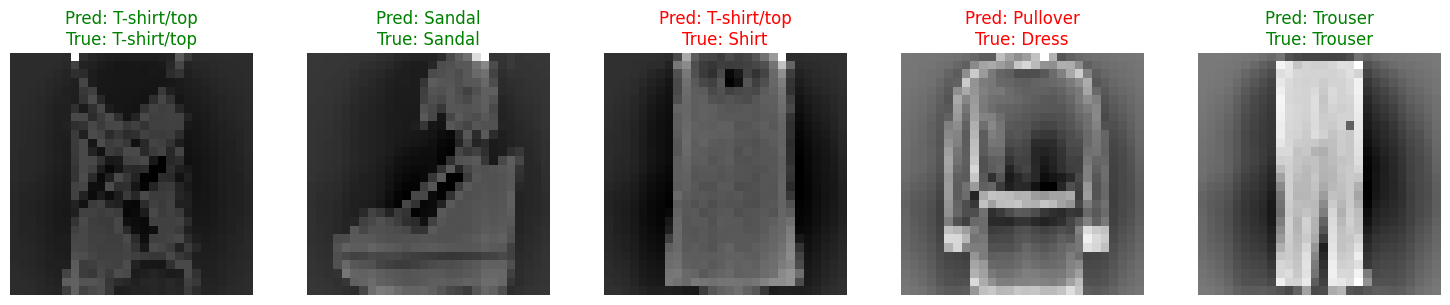

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define label names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Pick 5 random indices from the test set
# We use len(X_test) from the previous step where we prepared the Z-score data
indices = np.random.choice(len(X_test), 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

print("--- Visualizing Predictions on Z-Score Normalized Data ---")

for i, idx in enumerate(indices):
    img = X_test[idx]  # Shape: (784,)
    
    # 1. Forward pass to get prediction
    # We reshape to (1, 784) because the network expects a batch of inputs
    logits = nn.forward(img.reshape(1, -1))
    
    # 2. Softmax to get probabilities
    probs = nn.softmax(logits)
    prediction = np.argmax(probs)
    
    # 3. Get True Label
    # y_test is one-hot encoded, so we use argmax to get the index (0-9)
    true_label = np.argmax(y_test[idx])
    
    # 4. Plot
    # Reshape back to 28x28 for the image
    axes[i].imshow(img.reshape(28, 28), cmap='gray')
    
    # Set title color: Green if correct, Red if wrong
    title_color = 'green' if prediction == true_label else 'red'
    
    axes[i].set_title(f"Pred: {class_names[prediction]}\nTrue: {class_names[true_label]}", color=title_color)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Still must integrate momentum into the NN, and do the other weight initializations 

Next, I will integrate the validation metrics, like overfitting threshold, and do the stopiing condition, then maybe put it for some hyperparam tuning like weight decay or learning rate decay eventually. 